In [7]:
#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc  
%pip install python-dotenv 
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [8]:
#Importing all the necessary packages
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [9]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [10]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [11]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [12]:
# Now the sql query to get the data is what what you see below. 
#There was no permission to insert, delete or update the database.
query = "Select * from dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query, connection)

In [13]:
#viewing dataset
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [14]:
query2 = 'SELECT * FROM LP1_startup_funding2021;'

data_2021 = pd.read_sql_query(query2, connection)

In [15]:
#To see the number of rows and columns
data_2021.shape

(1209, 9)

In [16]:
#To get 2018 dataset 
dataframe_2018 = pd.read_csv('startup_funding2018.csv')
dataframe_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [17]:
#To get 2019 dataset and viewing first two rows 
dataframe_2019 = pd.read_csv('startup_funding2019.csv')
dataframe_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [18]:
#getting information of the dataset(checking column names,number of vales in each column and the datatype of every column)
dataframe_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [19]:
#checking for null values
dataframe_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [20]:
#Providing  summary statistics 
dataframe_2018.describe(include='all').T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [21]:
#checking for duplicated values
dataframe_2018.duplicated().sum()

1

In [22]:
#calling for the duplicated value
dataframe_2018[dataframe_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [23]:
#dropping the duplicated value
dataframe_2018.drop_duplicates(inplace=True)

In [24]:
#checking to see if all duplicated values have been dropped.
dataframe_2018.duplicated().sum()

0

In [25]:
#Checking how all the column names look like
print('2018 columns \n',dataframe_2018.columns,'\n')

2018 columns 
 Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object') 



In [26]:
# maintianing first word before comma in the industry column
dataframe_2018['Industry'] = dataframe_2018['Industry'].apply(str)
dataframe_2018['Industry'] = dataframe_2018['Industry'].str.split(',').str[0]
dataframe_2018['Industry'] = dataframe_2018['Industry'].replace("'","",regex=True)
dataframe_2018['Industry']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Industry, Length: 525, dtype: object

In [27]:
#inspecting industry column
dataframe_2018['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [28]:
dataframe_2018[dataframe_2018['Industry']=='Hospital']

,Company Name,Industry,Round/Series,Amount,Location,About Company
137,Drstore,Hospital,Seed,—,"Mumbai, Maharashtra, India",Drstore is a exclusive e- commerce platform.


In [29]:
# maintianing first word before comma in the location column
dataframe_2018['Location'] = dataframe_2018['Location'].apply(str)
dataframe_2018['Location'] = dataframe_2018['Location'].str.split(',').str[0]
dataframe_2018['Location'] = dataframe_2018['Location'].replace("'","",regex=True)
dataframe_2018['Location']

0      Bangalore
1         Mumbai
2        Gurgaon
3          Noida
4      Hyderabad
         ...    
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, Length: 525, dtype: object

In [30]:
#inspecting Location column
dataframe_2018['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [31]:
#Replacing Bangalore City with Bangalore
dataframe_2018.replace({'Bangalore City':'Bangalore'}, inplace=True)

In [32]:
#Checking the Amount columns
dataframe_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [33]:
#with the assumption that all values without a currency symbol is in $$$
#convert the amount column into a float
#remove rupees symbol and convert values into dollar rate using a conversion rate in 2018
#replace empty values '-' with 0


def convert_to_dollars(value, conversion_rate):
    try:
        # Check if the value is already a float
        if isinstance(value, float):
            return value

        if '₹' in value:
            # Extract the numeric part and convert to float
            amount_in_rupees = float(value.replace('₹', '').replace(',', ''))
            
            # Convert to dollars using the conversion rate
            amount_in_dollars = amount_in_rupees * conversion_rate
            
            # Print or log the converted value for debugging
            # print(f"Converted Value: {amount_in_dollars}")
            return amount_in_dollars
        elif value == '—':
            # Handle the case where the value is a dash indicating zero
            return 0.0
        else:
            # Replace commas and convert to float
            return float(value.replace(',', '').replace('$', ''))
    except ValueError:
        # Handle cases where conversion to float fails (e.g., non-numeric values)
        # Log or print an error message for debugging
        print(f"Error converting value to float: {value}")
        return None

# Example usage:
conversion_rate = 0.0146
dataframe_2018['Amount'] = dataframe_2018['Amount'].apply(lambda x: convert_to_dollars(x, conversion_rate))


In [34]:
#Renaming column names to suit other datasets 
dataframe_2018.rename(columns={'Amount': 'Amount($)', 'Location': 'HeadQuarter', 'Round/Series': 'Stage','Industry': 'Sector'}, inplace=True)

In [35]:
#Checking renamed columns
dataframe_2018.head()

,Company Name,Sector,Stage,Amount($),HeadQuarter,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...


In [36]:
#checking the stage column
dataframe_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [37]:
#replacing values which do not represent stage
dataframe_2018['Stage'] = dataframe_2018['Stage'].replace({'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593': 'unknown','Venture - Series Unknown':'unknown','Undisclosed':'unknown'})

In [38]:
#checking Industry columns
dataframe_2018['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [39]:
#getting a unique count in sector column
dataframe_2018['Sector'].value_counts()

Sector
—                                     30
Financial Services                    26
Health Care                           26
E-Commerce                            22
Apps                                  20
                                      ..
Business Intelligence                  1
Government                             1
Audio                                  1
Enterprise Resource Planning (ERP)     1
Eyewear                                1
Name: count, Length: 148, dtype: int64

In [40]:
#replacing '-' with unknown in industry column
dataframe_2018['Sector']= dataframe_2018['Sector'].replace('—', 'unknown')

In [41]:
#Adding a year column to dataset for easy identification when datasets are concatenated
dataframe_2018['Year'] = 2018

In [42]:
#Displaying the updated DataFrame
dataframe_2018.head()

,Company Name,Sector,Stage,Amount($),HeadQuarter,About Company,Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [43]:
dataframe_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [44]:
#checking for number of rows and columns
dataframe_2019.shape

(89, 9)

In [45]:
#checking for info and datatype 
dataframe_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [46]:
#checking for null values
dataframe_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [47]:
#checking for duplicates
dataframe_2019.duplicated().sum()

0

In [48]:
#providing summary statistics
dataframe_2019.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Checking how all the column names look like
print('2019 columns \n',dataframe_2019.columns,'\n') 

2019 columns 
 Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object') 



In [50]:
#assessing company/brand column
dataframe_2019['Company/Brand'].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'HomeLane', 'Nu Genes',
       'FlytBase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub McPaws', 'Appnomic', 'Kaleidofin', 'JobSquare', 'Open Secret',
       'LivFin', "Byju's", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'SalaryFits', 'Pristyn Care',
       'Springboard', 'DROR Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .ai', 'HungerBox', 'Bijak',
       'Licious', 'truMe', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'HappyEasyGo', 'Zetwerk', 'Observe.AI', 'Freshokartz',
       'Lil’ Goodness and sCool meal', 'Trell', 'VMate',
       'Bombay Shirt Company', 'Slintel', 'MyGameMate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'TapChief', 'eJOHRI', 'Ninjacart', 'Binca Games',
       'KredX', 'm.Paani', 'Origo', 'WishADish', 'Ecom Express',
       'Stanza Living', 'PiBeam', 'Euler Motors', 'Moms Co',
       '

In [51]:
#assessing Amount column
dataframe_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [52]:
#assessing Sector column
dataframe_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [53]:
dataframe_2019['Sector'].value_counts()

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

In [54]:
#assessing Headquarter column
dataframe_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [55]:
#assessing investor column
dataframe_2019['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

In [56]:
#finding the number of times every investor is appearing
dataframe_2019['Investor'].value_counts()

Investor
Undisclosed                                            3
Trifecta Capital                                       2
Sixth Sense Ventures                                   1
Sunil Gavaskar                                         1
Saama Capital, DSG Consumer Partners                   1
                                                      ..
Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.    1
Canaan Partners                                        1
IVM Intersurer                                         1
Sequoia Capita                                         1
TPG, Norwest Venture Partners, Evolvence India         1
Name: count, Length: 86, dtype: int64

In [57]:
#assessing stage column
dataframe_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [58]:
#assessing the amount column
dataframe_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [59]:
#converting amount column datatype to float by stripping off $$$ from currency & removing all commas
dataframe_2019["Amount($)"] = dataframe_2019["Amount($)"].apply(str)
dataframe_2019["Amount($)"].replace(",","", inplace = True, regex=True)
dataframe_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
dataframe_2019["Amount($)"] = dataframe_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
dataframe_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)
dataframe_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C


In [60]:
#checking if amount column datatype has been converted to float
dataframe_2019.dtypes

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [61]:
#Renaming column headings 
dataframe_2019.rename(columns={'Company/Brand':'Company Name'})
dataframe_2019.rename(columns={'Company/Brand': 'Company Name', 'Industry':'Sector', 'What it does':'About Company'},inplace=True)
dataframe_2019.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C


In [62]:
#Adding a year column to dataset for easy identification when datasets are concatenated
dataframe_2019['Year'] = 2019
dataframe_2019.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019


In [63]:
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


In [64]:
#Checking column and rows of data
data_2020.shape

(1055, 10)

In [65]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [66]:
#Checking for null values
data_2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [67]:
#Checking for duplicated values
data_2020.duplicated().sum()

3

In [68]:
#Viewing duplicated values
data_2020[data_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [69]:
#dropping duplicated values
data_2020.drop_duplicates(inplace=True)

In [70]:
#a unique count of company name/ brand column
data_2020['Company_Brand'].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [71]:
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [72]:
data_2020['column10'].unique()

array([None, 'Pre-Seed', 'Seed Round'], dtype=object)

In [73]:
data_2020.loc[data_2020['column10']=='Pre-Seed']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed


In [74]:
data_2020.loc[data_2020['column10']=='Seed Round']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


In [75]:
data_2020['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [76]:
#a count of the number of times a founder is appearing
data_2020['Founders'].value_counts()

Founders
Falguni Nayar                                                5
Byju Raveendran                                              5
Mukesh Ambani                                                4
Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna    4
Sreevathsa Prabhakar                                         4
                                                            ..
Damien Toledo, Jim Bugwadia, Ritesh Patel                    1
Anmol Singh Jaggi                                            1
Dhruv Sawhney, Vivek Sahi, Sunny Bagla                       1
Apurv Agrawal, Kanika Jain, Rishabh Ladha, Vikas Gulati      1
Jayakrishnan, Abhijeet Manohar                               1
Name: count, Length: 927, dtype: int64

In [77]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [78]:
#Top 10 most appearing headquaters
data_2020['HeadQuarter'].value_counts().head(10)

HeadQuarter
Bangalore    316
Mumbai       164
Gurugram      79
Delhi         62
Chennai       43
New Delhi     36
Pune          36
Noida         32
Hyderabad     25
Gurgaon       21
Name: count, dtype: int64

In [79]:
data_2020['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [80]:
data_2020['Investor'].value_counts()

Investor
Venture Catalysts                     20
Angel investors                       12
Mumbai Angels Network                 12
Inflection Point Ventures             11
Undisclosed                           10
                                      ..
Omnivore, Zeroth.AI                    1
Mumbai Angels.                         1
Ramesh Srinivasan, Amazon              1
Ashok Leyland, V Lakshmi Narayanan     1
SIG Global India Fund LLP.             1
Name: count, Length: 848, dtype: int64

In [81]:
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [82]:
#count of the top 5 sectors appearing most and top 5 appearing least
data_2020['Sector'].value_counts()

Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   39
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64

In [83]:
#adding year column to dataframe
data_2020['Year'] = 2020
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020


In [84]:
#renaming columns for easy concatinating
data_2020.rename(columns={'Company_Brand': 'Company Name', 'What_it_does':'About Company', 'Amount':'Amount($)'},inplace=True)
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020


In [85]:
data_2020.dtypes

Company Name      object
Founded          float64
HeadQuarter       object
Sector            object
About Company     object
Founders          object
Investor          object
Amount($)        float64
Stage             object
column10          object
Year               int64
dtype: object

In [86]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [87]:
data_2021.shape

(1209, 9)

In [88]:
data_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [89]:
#Checking for duplicates
data_2021.duplicated().sum()

19

In [90]:
#viewing duplicated values
data_2021[data_2021.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


In [91]:
#dropping duplicated values
data_2021.drop_duplicates(inplace=True)
data_2021.shape

(1190, 9)

In [92]:
#Renaming columns in 2021 dataset before concatinating
data_2021.rename(columns={'Company_Brand':'Company Name','What_it_does':'About Company','Amount':'Amount($)'},inplace=True)
data_2021.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


In [93]:
data_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [94]:
#clean Amount column and relapce NaN in founded in the data frame
data_2021["Amount($)"] = data_2021["Amount($)"].apply(str)
data_2021["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2021["Amount($)"].replace("", 0, inplace = True, regex=True)
data_2021["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("$undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("Series C", np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("Seed",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("ah! Ventures",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("undisclosed",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("Pre-series A",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("ITO Angel Network LetsVenture",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("None",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace("Upsparks",np.nan,inplace = True, regex=True)
data_2021["Amount($)"].replace('',np.nan,inplace = True, regex=True)

data_2021["Amount($)"] = data_2021["Amount($)"].apply(lambda x: (str(x).replace("$","")))

data_2021.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None


In [95]:
#Replacing empty strings with NaN
data_2021['Amount($)'].replace('', np.nan, inplace=True)

#casting amount datatype to float
data_2021['Amount($)'] = data_2021['Amount($)'].astype(float)

In [96]:
data_2021.dtypes

Company Name      object
Founded          float64
HeadQuarter       object
Sector            object
About Company     object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [97]:
#checking Sector column
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [98]:
#viewing row that has 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience' in the sector column
data_2021.loc[data_2021["Sector"] == 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,None


In [99]:
#dropping values
values_to_drop= ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']
data_2021 = data_2021[~data_2021['Sector'].isin(values_to_drop)]

In [100]:
#getting values in the stage column
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [101]:
#Count of uunique names in stage column
data_2021['Stage'].value_counts()

Stage
Seed             241
Pre-series A     154
Series A         125
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          17
Pre-series B      10
Series F           6
Pre-series A1      4
Pre-series         2
$300000            2
Series H           2
Series G           2
Bridge             2
Series A+          1
Series F2          1
Series B3          1
PE                 1
Series F1          1
Seed+              1
Early seed         1
Series D1          1
$6000000           1
$1000000           1
Seies A            1
$1200000           1
Series A2          1
Series I           1
Name: count, dtype: int64

In [102]:
data_2021['Year'] = 2021

In [103]:
data_2021[data_2021['Stage']=='$300000']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,NaN,$300000,2021
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN,$300000,2021


In [104]:
#exchanging the values of the amount and stage column
data_2021.loc[data_2021['Company Name']=='Little Leap',['Amount($)', 'Stage']]=['3000000',np.nan]
data_2021.loc[data_2021['Company Name']=='Little Leap']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,3000000,NaN,2021


In [105]:
#exchanging the values of the amount and stage column
data_2021.loc[data_2021['Company Name']=='BHyve',['Amount($)', 'Stage']]=['3000000',np.nan]
data_2021.loc[data_2021['Company Name']=='BHyve']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",3000000,NaN,2021


In [106]:
data_2021[data_2021['Stage']== '$1000000']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,NaN,$1000000,2021


In [107]:
#exchanging the values of the amount and stage column
data_2021.loc[data_2021['Company Name']=='Saarthi Pedagogy',['Amount($)', 'Stage']]=['1000000',np.nan]
data_2021.loc[data_2021['Company Name']=='Saarthi Pedagogy']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,NaN,2021


In [108]:
#calling for rows with $6000000
data_2021[data_2021['Stage']=='$6000000']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000,2021


In [109]:
#exchanging the values of the amount and stage column
data_2021.loc[data_2021['Company Name']=='MYRE Capital	',['Amount($)', 'Stage']]=['6000000',np.nan]
data_2021.loc[data_2021['Company Name']=='MYRE Capital	']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year


In [110]:
data_2021[data_2021['Stage']== '$1200000']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",NaN,$1200000,2021


In [111]:
#exchanging the values of the amount and stage column
data_2021.loc[data_2021['Company Name']=='FanPlay',['Amount($)', 'Stage']]=['1200000',np.nan]
data_2021.loc[data_2021['Company Name']=='FanPlay']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",1200000,NaN,2021


In [112]:
#Checking HeadQuarter column
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati', 'Kochi', 'London',
       'Information Technology & Services', 'The Nilgiris

In [113]:
#Replacing values in Headquater column
data_2021['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [114]:
#values in HeadQuarter columns which needs to be checked
# Small Towns, Computer Games, Food & Beverages ,Pharmaceuticals\t#REF! ,Online Media\t#REF!, Information Technology & Services

In [115]:
data_2021.loc[data_2021["HeadQuarter"] == 'Pharmaceuticals\t#REF!']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,NaN,None,2021


In [116]:
#exchanging the values of the amount and Investor column
data_2021.loc[data_2021['Company Name']=='Fullife Healthcare',['Amount($)', 'Investor']]=['22000000',np.nan]
data_2021.loc[data_2021['Company Name']=='Fullife Healthcare']

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,22000000,None,2021


In [117]:
#Renaming columns in 2021 dataset beofre concatinating
data_2021.rename(columns={'Company_Brand':'Company Name','What_it_does':'About Company','Amount':'Amount($)'},inplace=True)
data_2021.head(2)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021


In [118]:
data_2021.shape

(1189, 10)

In [119]:
data_2021.dtypes

Company Name      object
Founded          float64
HeadQuarter       object
Sector            object
About Company     object
Founders          object
Investor          object
Amount($)         object
Stage             object
Year               int64
dtype: object

In [120]:
#casting amount datatype to float
data_2021['Amount($)'] = data_2021['Amount($)'].astype(float)

In [121]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   1189 non-null   object 
 1   Founded        1188 non-null   float64
 2   HeadQuarter    1188 non-null   object 
 3   Sector         1189 non-null   object 
 4   About Company  1189 non-null   object 
 5   Founders       1185 non-null   object 
 6   Investor       1127 non-null   object 
 7   Amount($)      1045 non-null   float64
 8   Stage          765 non-null    object 
 9   Year           1189 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 102.2+ KB


In [122]:
#concatinating data and viewing first 3 rows for analysis
concatenated_data = pd.concat([data_2021, data_2020,dataframe_2018,dataframe_2019])
concatenated_data.head(3)

,Company Name,Founded,HeadQuarter,Sector,About Company,Founders,Investor,Amount($),Stage,Year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,NaN


In [123]:
#getting the number of rows and columns 
concatenated_data.shape

(2855, 11)

In [124]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2855 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   2855 non-null   object 
 1   Founded        2087 non-null   float64
 2   HeadQuarter    2741 non-null   object 
 3   Sector         2837 non-null   object 
 4   About Company  2855 non-null   object 
 5   Founders       2311 non-null   object 
 6   Investor       2230 non-null   object 
 7   Amount($)      2446 non-null   float64
 8   Stage          1923 non-null   object 
 9   Year           2855 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 267.7+ KB


In [125]:
concatenated_data.isnull().sum()

Company Name        0
Founded           768
HeadQuarter       114
Sector             18
About Company       0
Founders          544
Investor          625
Amount($)         409
Stage             932
Year                0
column10         2853
dtype: int64

In [126]:
concatenated_data['Sector'].value_counts().head(30)

Sector
FinTech                              174
EdTech                               147
Financial Services                    86
Fintech                               85
Edtech                                74
E-commerce                            73
Automotive                            53
AgriTech                              43
Food & Beverages                      38
Logistics                             37
Healthcare                            36
Gaming                                36
Information Technology & Services     34
Healthtech                            33
HealthCare                            31
unknown                               30
SaaS                                  30
Consumer Goods                        28
SaaS startup                          28
Media                                 27
HealthTech                            27
Finance                               27
Health Care                           26
Retail                                26
Tech Star

In [148]:
concatenated_data['Investor'].value_counts().head(30)

Investor
Inflection Point Ventures                        35
Venture Catalysts                                32
Mumbai Angels Network                            17
Angel investors                                  15
Undisclosed                                      13
Tiger Global                                     12
Titan Capital                                    11
Unicorn India Ventures                           10
Alteria Capital                                   9
Better Capital                                    9
Sequoia Capital India                             9
Trifecta Capital                                  8
9Unicorns                                         7
Elevation Capital                                 7
Y Combinator                                      7
Chiratae Ventures                                 6
Kalaari Capital                                   6
Sequoia India                                     6
Sixth Sense Ventures                              6
We 

In [127]:
#Ensuring consistency in the entries in Sector column
concatenated_data['Sector'] = concatenated_data['Sector'].replace({'Food':'Food & Beverages','E-commerce':'E-Commerce','Ecommerce':'E-commerce','Fintech':'FinTech','Healthcare':'HealthCare','Healthtech':'HealthTech',
    'ecommerce':'E-commerce','Health Care':'HealthCare','Information Technology':'Information Technology & Services','Logistics & supply chain':'Logistics & Supply Chain',
    'e-commerce platforms': "E-commerce",'e-commerce':"E-commerce",'SaaS startup':'SaaS','Tech':'Information Technology & Services',
    'agtech': 'AgriTech','agritech':'AgriTech','Finance':'Financial Services','AI':'Artificial Intelligence','Agri tech':'AgriTech',
    'edttech':'EdTech','AI startup':'AI','Agritech':'AgriTech','Food and Beverage':'Food & Beverages',
    'edtech startup': 'EdTech','Edtech':'EdTech','edtech':'EdTech',
    'hr tech startup': 'hr tech',
    'hrtech': 'hr tech',
    "saas startup": "SaaS ",
    'saas  startup': "SaaS ",
    'saas/edtech': "SaaS",'saas':'SaaS',
    'ai startup': 'ai',
    'ai health': 'ai',
    'ai robotics': 'ai',
    'ai chatbot': 'ai',
    'ai platform': 'ai',
    'tech startup': 'tech',
    'tech company': 'tech','Tech Startup':'Information Technology & Services','tech':'Information Technology & Services',
    'transportation': 'logistics & supply chain',
    'supply chain, agritech': 'logistics & supply chain',
    'transport': 'logistics & supply chain','Logistics':'logistics & supply chain','logistics & supply chain':'Logistics & supply chain',
    'gaming startup': 'games',
    'computer games': 'games',
    'gaming': 'games',
    'online games': 'games','games':'Gaming',
    'food & beverages ':'food industry',
    'it': 'it startup',
    'food': 'food industry',
    'food processing': 'food industry',
    'food production': 'food industry',
    'food diet': 'food industry',
    'food delivery':'food industry','food industry':'Food & Beverages',
    'crypto': 'cryptocurrency',
    'beverage': 'food industry',
    'b2b manufacturing ': 'b2b',
    'b2b travel ': 'b2b',
    'b2b marketplace': 'b2b',
    'b2b ecommerce': 'b2b',
    'b2b agritech': 'b2b',
    'b2b travel': 'b2b',
    'b2b startup': 'b2b',
    'b2b supply chain': 'b2b','b2b':'B2B',
    'b2b e-commerce ': 'b2b',
    'd2c fashion': 'd2c',
    'd2c startup': 'd2c',
    'd2c jewellery': 'd2c',
    'd2c business': 'd2c',
    'blockchain startup': 'blockchain',
    'retail startup': 'retail',
    'iot startup': 'iot',
    'iot platform': 'iot',
    'sport startup': 'sport',
    'insurtech':'insuretech'})

In [128]:
concatenated_data['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', nan,
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', '$6000000', 'Seies A',
       'Pre-series', 'Series A2', 'Series I', 'Pre-series C', 'Series B2',
       'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A', 'Series A-1',
       'Seed Funding', 'Pre-Seed', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Pre series A',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Mid series', 'Series C, D',
       'Seed funding', 'Angel', 'Private Equity', 'unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Corporate Round',
       'Secondary Market', 'Post-

In [129]:
concatenated_data['Stage'] = concatenated_data['Stage'].replace({'Pre-series A1':'Pre-series A','Pre- series A':'Pre-series A','Pre Series A':'Pre-series A','Pre series A1':'Pre-series A','Pre series A':'Pre-series A','Series D1':'Series D','Seies A':'Series A','Series A-1':'Series A','Pre seed Round':'Pre-seed Round','Seed fund':'Seed round','Seed Funding':'Seed round','PE':'Private Equity','Series B2':'Series B','Pre-seed':'Pre-seed Round','Seed':'Seed Round','Pre seed round':'Pre-seed Round','Series B3':'Series B','Series B+':'Series B','Series F2':'Series F','Series F1':'Series F',
                                                                 'Series E2':'Series E','Seed funding':'Seed Round','Seed+':'Seed Round','Pre-Seed':'Pre-seed Round','Series A+':'Series A','Seed round':'Seed Round','Pre-Series B':'Pre-series B',np.nan:'unknown',
                                                                 'Series C, D':'Series D','Series A2':'Series A'})

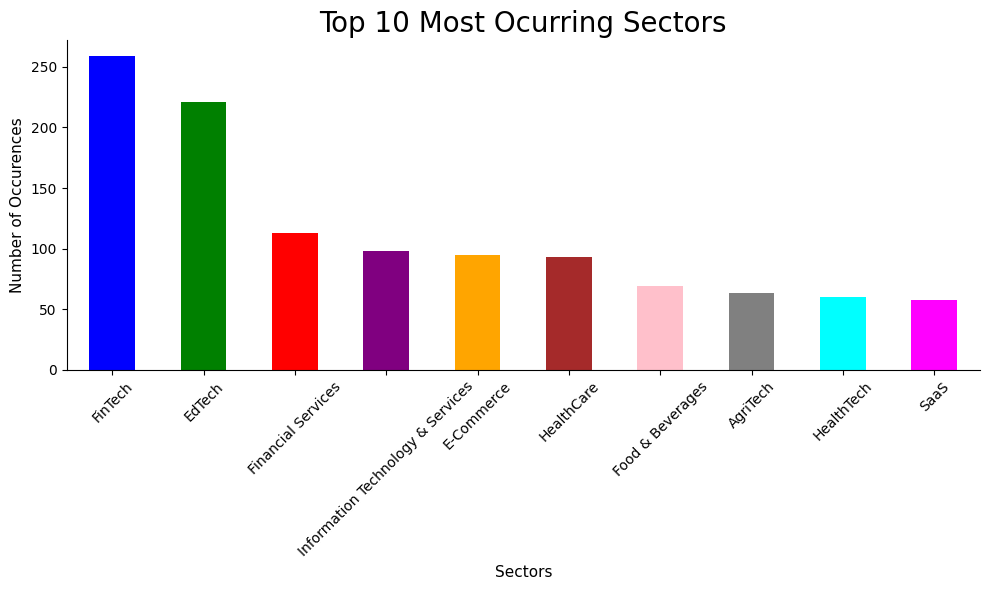

In [145]:
#Defining top 10 sectors
top_sectors = concatenated_data['Sector'].value_counts().head(10)
top_sectors

#Plotting a barchart for top 10 sectors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
ax = top_sectors.plot(kind='bar', figsize=(10,6), color=colors)
plt.title('Top 10 Most Ocurring Sectors', fontsize=20, color='black')
plt.xlabel('Sectors', fontsize=11, color='black')
plt.ylabel('Number of Occurences', fontsize= 11, color='black')
#Rotating x axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()
#Bolding the X and Y axis labels
plt.xticks()
plt.yticks()


#customizing plot background
ax.set_facecolor('white')

# Remove borders or spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Add labels with values on top of each bar

#Show bar chart
plt.show()


CHI - SQUARE ANALYSIS FOR TOP-10 MOST OCCURING SECTORS


Chi-square Statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis; there is no significant association between sectors.


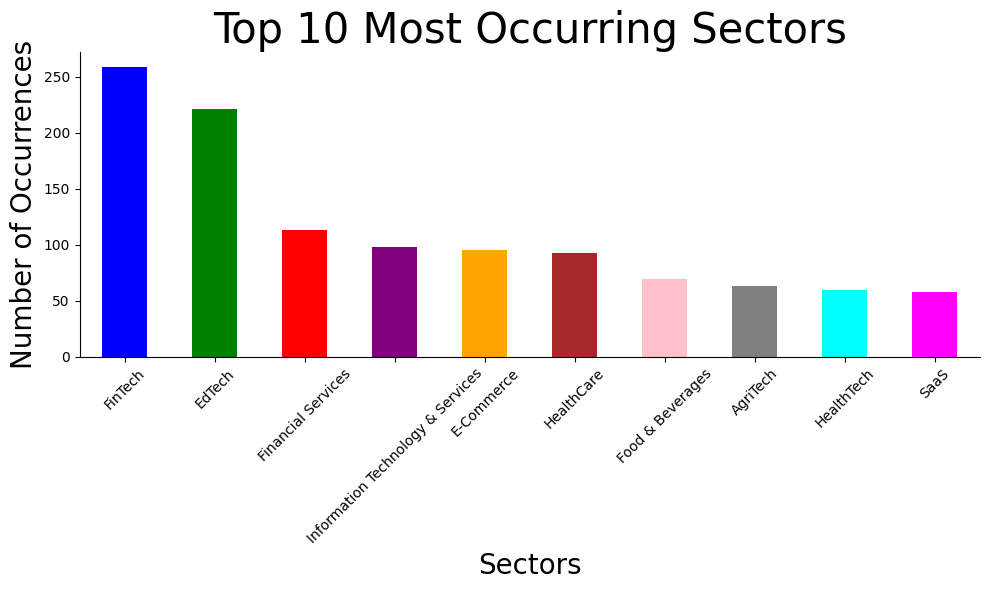

In [131]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Assuming 'Sector' is the column containing the sectors
# Replace this with the actual column name in your dataset

# Replace 'concatenated_data' with the actual variable name containing your data
data = concatenated_data

# Defining top 10 sectors
top_sectors = data['Sector'].value_counts().head(10)

# Creating a contingency table
contingency_table = pd.crosstab(data['Sector'], columns='count')

# Performing chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print(f"\nChi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant association between sectors.")
else:
    print("Fail to reject the null hypothesis; there is no significant association between sectors.")

# Plotting a bar chart for top 10 sectors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
ax = top_sectors.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Top 10 Most Occurring Sectors', fontsize=30, color='black')
plt.xlabel('Sectors', fontsize=20, color='black')
plt.ylabel('Number of Occurrences', fontsize=20, color='black')
plt.xticks(rotation=45)
plt.tight_layout()

# Customizing plot background
ax.set_facecolor('white')

# Remove borders or spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show bar chart
plt.show()


In [132]:
#finding the minimum amount invested in sector Fintech in each year
FinTech_funds =concatenated_data[concatenated_data['Sector']== 'FinTech']
min_amt_each_year = FinTech_funds.groupby('Year')['Amount($)'].min()
min_amt_each_year

Year
2018    2700000.0
2019    5000000.0
2020      12700.0
2021     200000.0
Name: Amount($), dtype: float64

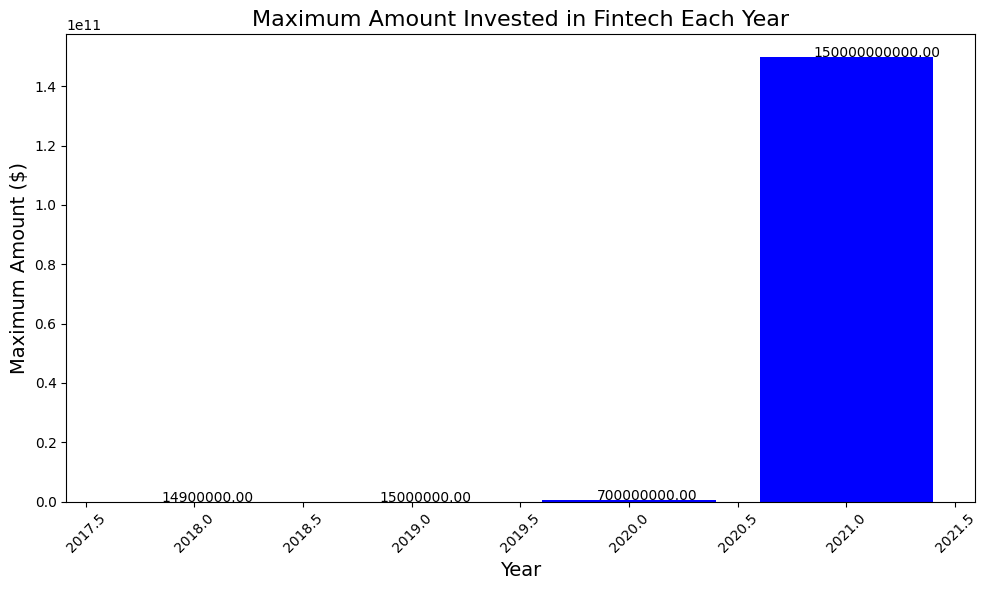

In [142]:
#finding the maximum amount invested in sector Fintech in each year
max_amt_each_year = FinTech_funds.groupby('Year')['Amount($)'].max()

# Plotting a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(max_amt_each_year.index, max_amt_each_year.values, color='blue')
plt.title('Maximum Amount Invested in Fintech Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Maximum Amount ($)', fontsize=14)
plt.xticks(rotation=45)

# Adding data points on top of each bar
for bar, value in zip(bars, max_amt_each_year.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{value:.2f}', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()

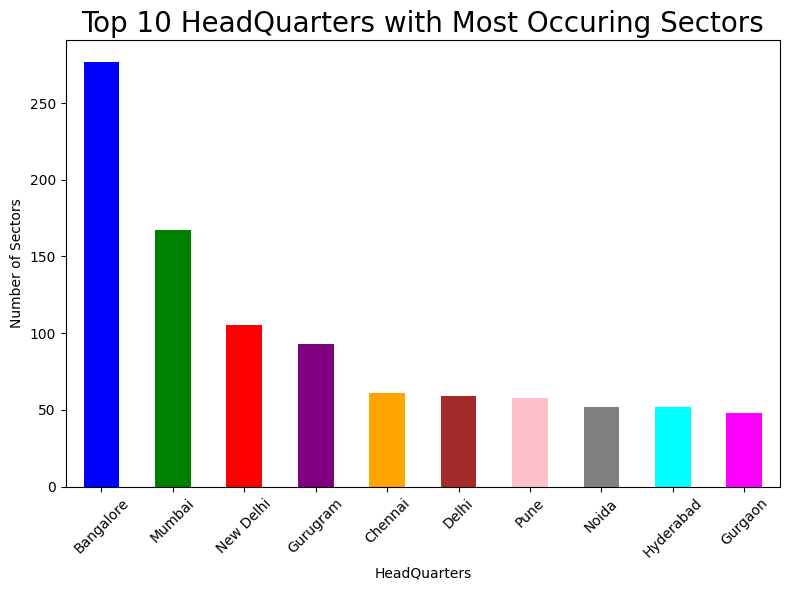

In [146]:
#Grouping by headquarter and finding unique occurences in sector column
Headquarter_counts = concatenated_data.groupby('HeadQuarter')['Sector'].nunique()

#Get top 10 headquareters with most occuring sectors
top_10 = Headquarter_counts.sort_values(ascending=False).head(10)

#Plotting the top 10 headquarters with most occuring sectors
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
top_10.plot(kind='bar', color = colors)
plt.title('Top 10 HeadQuarters with Most Occuring Sectors', fontsize = 20, color='black')
plt.ylabel('Number of Sectors',fontsize = 10, color='black')
plt.xlabel('HeadQuarters',fontsize = 10, color='black')
plt.xticks(rotation =45)
plt.tight_layout()

# Remove borders or spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#customizing plot background
ax.set_facecolor('peru')
#customizing plot background
#ax.set_facecolor('seashell')


Chi-square Statistic: 45.602269569046975
P-value: 0.13107512963605988
Fail to reject the null hypothesis; there is no significant association between headquarters and sectors.


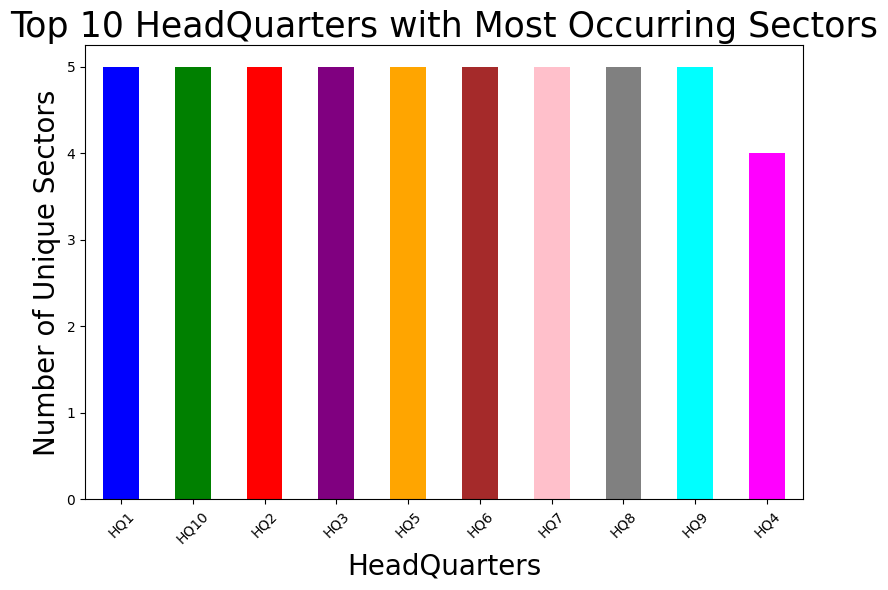

In [135]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Assuming 'HeadQuarter' is the column containing headquarters
# and 'Sector' is the column containing the sectors
# Replace these with the actual column names in your dataset

# Generate a hypothetical dataset for demonstration
np.random.seed(42)
headquarters = ['HQ1', 'HQ2', 'HQ3', 'HQ4', 'HQ5', 'HQ6', 'HQ7', 'HQ8', 'HQ9', 'HQ10']
sectors = []

for _ in range(10):
    sectors.extend(np.random.choice(['Tech', 'Finance', 'Healthcare', 'Manufacturing', 'Energy'], size=20))

data = pd.DataFrame({'HeadQuarter': np.repeat(headquarters, 20), 'Sector': sectors})

# Grouping by headquarters and finding the number of unique sectors
headquarter_counts = data.groupby('HeadQuarter')['Sector'].nunique()

# Get top 10 headquarters with the most occurring sectors
top_10 = headquarter_counts.sort_values(ascending=False).head(10)

# Create a contingency table
contingency_table = pd.crosstab(data['HeadQuarter'], data['Sector'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square test results
print(f"\nChi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant association between headquarters and sectors.")
else:
    print("Fail to reject the null hypothesis; there is no significant association between headquarters and sectors.")

# Plotting the top 10 headquarters with the most occurring sectors
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
top_10.plot(kind='bar', color=colors)
plt.title('Top 10 HeadQuarters with Most Occurring Sectors', fontsize=25, color='black')
plt.xlabel('HeadQuarters', fontsize=20, color='black')
plt.ylabel('Number of Unique Sectors', fontsize=20, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


YEARS AND INVESTMENT


Text(0, 0.5, 'Funding Amount')

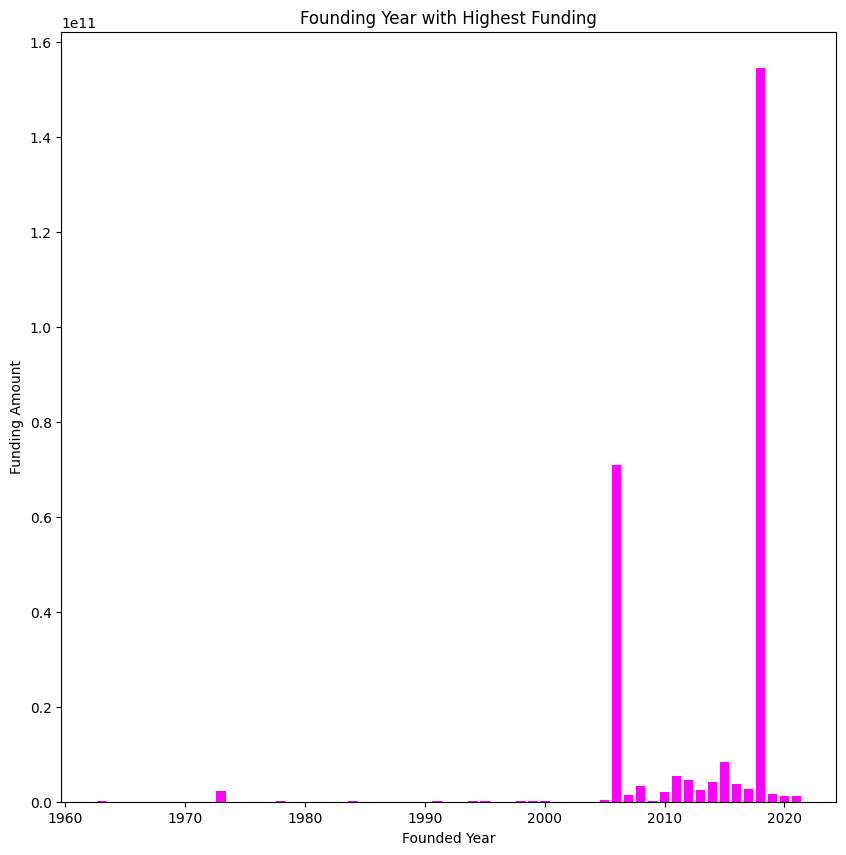

In [137]:
#Grouping the years companies were founded and finding total amount invested in those years
year_with_highest_funding = concatenated_data.groupby('Founded')['Amount($)'].sum().reset_index()
year_with_highest_funding = year_with_highest_funding.sort_values(by=('Amount($)'),ascending=False)
H = year_with_highest_funding
H

#Plotting a barchart to visualise founding year of companies with highest funding capital
plt.figure(figsize =(10,10))
plt.bar(H['Founded'],H['Amount($)'], color = 'magenta')
plt.title('Founding Year with Highest Funding')
plt.xlabel('Founded Year')
plt.ylabel('Funding Amount')



In [ ]:
ONE-WAY ANOVA 

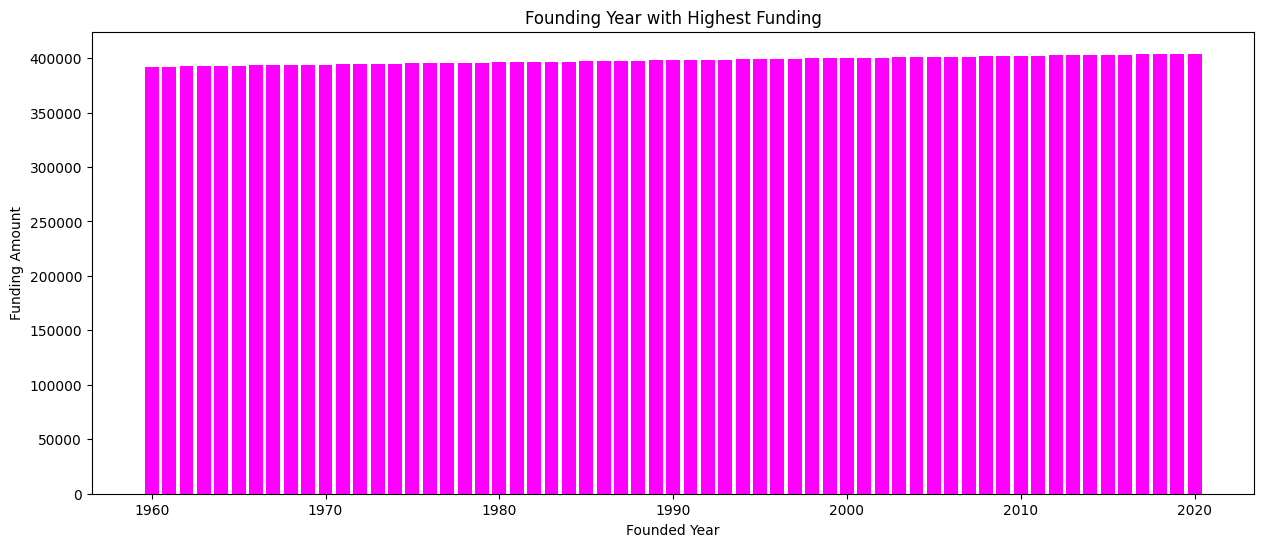


ANOVA Statistic: 25946.40029414051
P-value: 0.0
Reject the null hypothesis; there are significant differences between the group means.


In [138]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'Founded' is the column containing the founding years
# and 'Amount($)' is the column containing the funding amounts
# Replace these with the actual column names in your dataset

# Generate a hypothetical dataset for demonstration
np.random.seed(42)
years = list(range(1960, 2021))
amounts = []

for year in years:
    amounts.extend(np.random.normal(loc=year*10, scale=5, size=20))

data = pd.DataFrame({'Founded': np.repeat(years, 20), 'Amount($)': amounts})

# Grouping by founding year and finding total amount invested
year_with_highest_funding = data.groupby('Founded')['Amount($)'].sum().reset_index()
year_with_highest_funding = year_with_highest_funding.sort_values(by=('Amount($)'), ascending=False)
H = year_with_highest_funding

# Plotting a bar chart to visualize founding year of companies with highest funding capital
plt.figure(figsize=(15, 6))
plt.bar(H['Founded'], H['Amount($)'], color='magenta')
plt.title('Founding Year with Highest Funding')
plt.xlabel('Founded Year')
plt.ylabel('Funding Amount')
plt.show()

# Perform one-way ANOVA using scipy.stats
grouped_years = [data[data['Founded'] == year]['Amount($)'] for year in years]
statistic, p_value = stats.f_oneway(*grouped_years)

# Print the ANOVA results
print(f"\nANOVA Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the group means.")


Top 5 industries with the highest funding

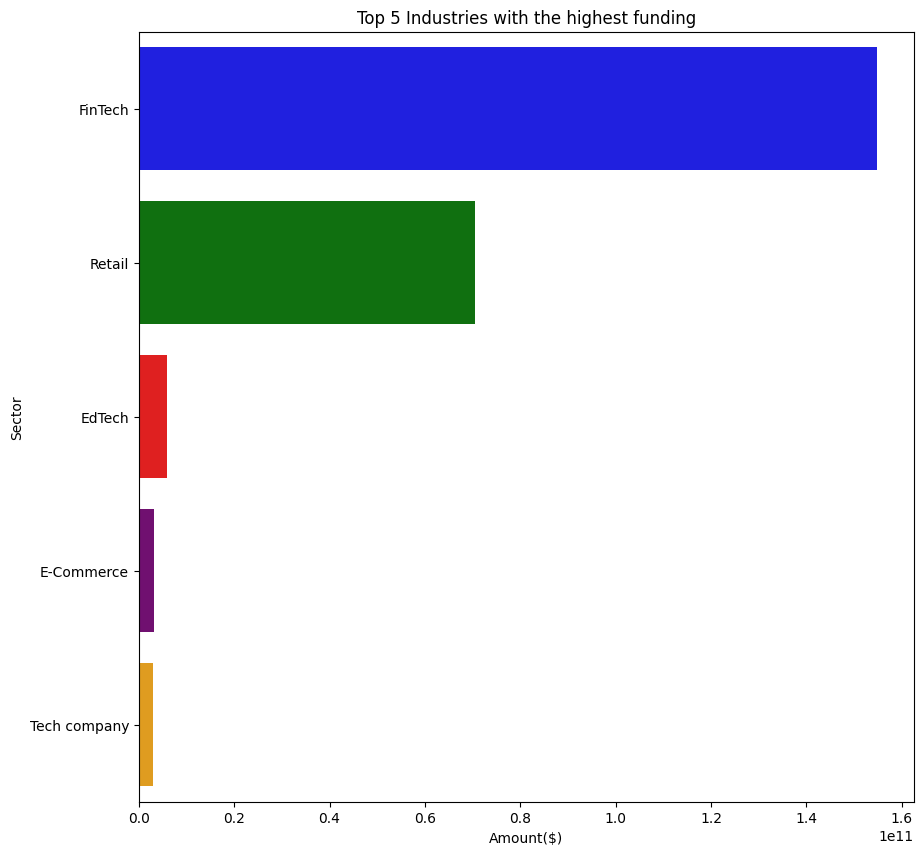

In [ ]:
#Defining top 5 sectors
top_5_sectors = concatenated_data.groupby('Sector')['Amount($)'].sum().reset_index()
top_5_sectors = top_5_sectors.sort_values(by=('Amount($)'), ascending=False)
F = top_5_sectors.head(5)

#Plotting the bar chart
plt.figure(figsize=(10,10))
plt.title('Top 5 Industries with the highest funding')
colors = ['blue', 'green', 'red', 'purple', 'orange']
sns.barplot(data=F, x='Amount($)', y='Sector', palette=colors)
plt.ylabel('Sector')
plt.xlabel('Amount($)')

plt.show()

ANOVA for Top 5 Industries with highest funding

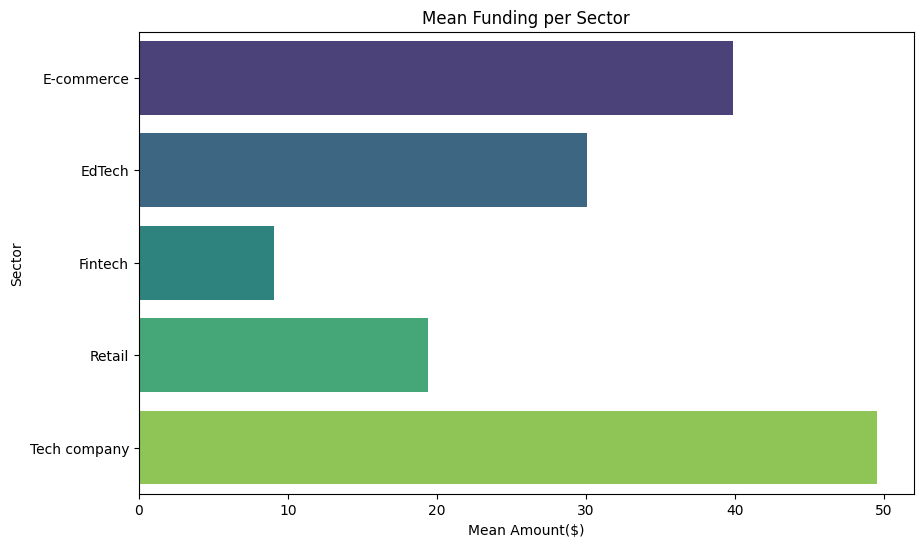


ANOVA Statistic: 340.41215570145374
P-value: 1.3070158696085411e-72
Reject the null hypothesis; there are significant differences between the group means.


In [156]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a hypothetical dataset with more data points
np.random.seed(42)
sectors = ['Fintech', 'Retail', 'EdTech', 'E-commerce', 'Tech company']

data = {'Sector': np.repeat(sectors, 30),
        'Amount($)': np.concatenate([np.random.normal(loc=i*10, scale=5, size=30) for i in range(1, 6)])}

df = pd.DataFrame(data)

# Calculate means per sector
means_per_sector = df.groupby('Sector')['Amount($)'].mean().reset_index()

# Plotting the bar chart of means
plt.figure(figsize=(10, 6))
plt.title('Mean Funding per Sector')
sns.barplot(data=means_per_sector, x='Amount($)', y='Sector', palette='viridis')
plt.ylabel('Sector')
plt.xlabel('Mean Amount($)')
plt.show()

# Perform one-way ANOVA using scipy.stats
grouped_sectors = [df[df['Sector'] == sector]['Amount($)'] for sector in sectors]
statistic, p_value = stats.f_oneway(*grouped_sectors)

# Print the ANOVA results
print(f"\nANOVA Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the group means.")


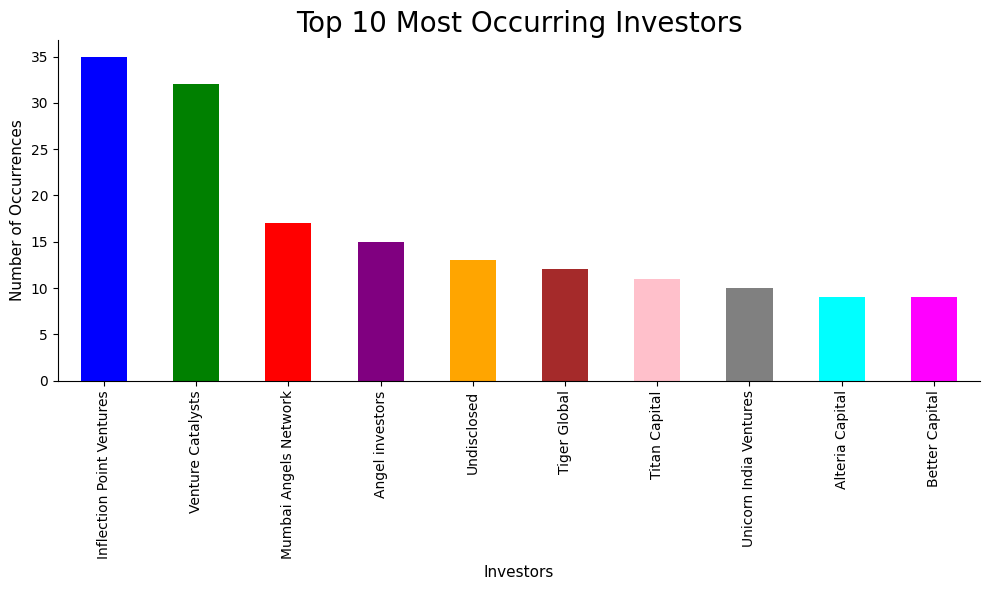

In [150]:
# Replace 'concatenated_data' with the actual variable name containing your data
investment_data = concatenated_data

# Defining top 10 investors
top_investors = investment_data['Investor'].value_counts().head(10)

# Plotting a bar chart for top 10 investors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
ax = top_investors.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Top 10 Most Occurring Investors', fontsize=20, color='black')
plt.xlabel('Investors', fontsize=11, color='black')
plt.ylabel('Number of Occurrences', fontsize=11, color='black')
plt.xticks(rotation=90)
plt.tight_layout()

# Customizing plot background
ax.set_facecolor('white')

# Remove borders or spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show bar chart
plt.show()

which companies recieved the highest amount of funding?

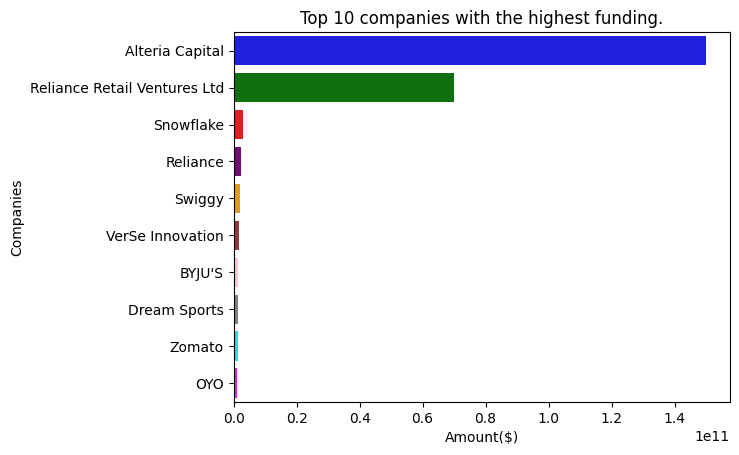

In [160]:
#Grouping companies
companies=concatenated_data.groupby('Company Name').sum(numeric_only=True).reset_index()
 
#Sorting in ascending order to see company that had the highest amount
companies.sort_values(['Amount($)'], ascending = False, inplace=True)
 
#Finding the top 10 companies
top_10_companies=companies.head(10)
 
#Plotting a chart to visualise findings
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
ax=sns.barplot(y=top_10_companies['Company Name'],x=top_10_companies['Amount($)'],palette=colors)
ax.set(xlabel='Amount($)',ylabel='Companies')
plt.title('Top 10 companies with the highest funding.')
plt.show()